# LDA classification of CyTOF

#### Verifying results of Predicting   cell   types   in   single   cell   mass   cytometry data

In [31]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
from sklearn.metrics import f1_score
import os
from sklearn.model_selection import KFold
from sklearn import metrics
import matplotlib.pyplot as plt

sklearn LDA sample

http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html#sklearn.discriminant_analysis.LinearDiscriminantAnalysis

### Sample of data
28 features over a large number of cells per CSV

In [18]:
sample = pd.read_csv("../Data/HMIS-1/Samples/Samples01_CeD.csv", header=None)
markers = ['CCR6','CD19','C-KIT','CD11b','CD4','CD8a','CD7','CD25','CD123','TCRgd','CD45',
           'CRTH2','CD122','CCR7','CD14','CD11c','CD161','CD127','CD8b','CD27','IL-15Ra','CD45RA',
           'CD3','CD28','CD38','NKp46','PD-1','CD56']
sample.columns = markers
sample.head(10)

,CCR6,CD19,C-KIT,CD11b,CD4,CD8a,CD7,CD25,CD123,TCRgd,...,CD8b,CD27,IL-15Ra,CD45RA,CD3,CD28,CD38,NKp46,PD-1,CD56
0,0.00000,1.085600,0.00000,0.74139,0.00000,3.36620,4.44010,0.000000,0.000000,2.18260,...,0.0000,1.3079,0.00000,4.30830,0.875990,1.45540,5.1563,1.780700,0.00000,3.89030
1,0.00000,0.000000,0.01100,0.00000,4.10050,0.70986,3.43200,0.575670,0.006000,2.16630,...,0.0000,4.2390,0.00000,3.18660,4.679200,2.43820,2.1834,0.000000,0.00000,0.83889
2,0.00000,0.718080,0.00000,1.02720,4.46690,1.78540,4.58310,1.251000,0.000000,1.95560,...,1.0206,4.1595,0.87585,3.67660,4.843400,2.51750,5.1084,0.360730,0.00000,0.13717
3,2.62200,0.000000,0.00000,0.00000,0.50629,0.00000,0.00000,0.000000,0.086891,2.00060,...,1.5498,0.0000,0.00000,3.96750,0.470450,0.00000,2.5044,0.000000,0.00000,0.00000
4,1.55330,0.000000,0.00000,0.51423,0.00000,3.39030,5.61950,0.017399,0.000000,1.26040,...,1.3466,4.6891,0.54675,2.45160,0.055771,0.49921,4.9283,4.339900,0.00000,5.88430
5,0.00000,0.895450,0.52039,0.87272,4.63860,2.14740,2.46940,2.393000,0.000000,0.85497,...,0.0000,3.1459,0.49494,0.41278,3.770400,2.95100,0.0000,0.000000,2.51320,0.00000
6,0.49850,0.000000,0.00000,4.21490,2.40460,0.79798,0.00000,0.000000,0.060363,0.00000,...,0.0000,0.0000,0.00000,2.28000,0.000000,0.00000,4.7208,0.272800,0.00000,0.79212
7,0.79122,0.000000,0.00000,0.00000,4.57960,0.29069,4.08020,0.022798,0.000000,1.27990,...,1.4529,4.4697,2.49790,3.83380,4.024800,1.98380,2.9021,0.000000,0.00000,0.00000
8,0.00000,0.053175,0.21142,0.00000,4.64890,1.16870,4.19110,0.796630,1.099400,0.71934,...,1.2473,4.3725,2.71460,3.92080,5.332100,2.99210,3.1731,0.036992,0.50133,0.00000
9,2.09870,0.000000,0.00000,0.44279,0.00000,0.00000,0.14192,0.000000,1.062000,1.65130,...,0.0000,1.1142,0.00000,4.55620,2.621100,0.66133,1.7915,0.000000,0.00000,0.00000


X-fold validation with one file/sample being left out each iteration and used as test:
CV-samples in paper

In [3]:
labelfiles = os.listdir("../Data/HMIS-1/Labels/")
samplefiles = os.listdir("../Data/HMIS-1/Samples/")
labelfiles.sort()
samplefiles.sort()
scorespersample = []


## Stratify HMIS-1 per sample
Train 47 iterations of HMIS-1 with 46 samples, leaving one out <br>
Predict labels for sample which was excluded from training <br>
Save predictions to file and prediction accuracy to variable <br>
HMIS-1 CV-samples in paper

In [4]:
kfoldsplitter = KFold(n_splits=47)
for train, test in kfoldsplitter.split(labelfiles):
    classifier = LinearDiscriminantAnalysis()
    for trainingset in train:
        X = pd.read_csv("../Data/HMIS-1/Samples/" + samplefiles[trainingset], header=None).values #train
        y = pd.read_csv("../Data/HMIS-1/Labels/" + labelfiles[trainingset], header=None).values.ravel() #labels
        classifier.fit(X, y)
    testdata = pd.read_csv("../Data/HMIS-1/Samples/" + samplefiles[test[0]], header=None).values #test
    testlabels = pd.read_csv("../Data/HMIS-1/Labels/" + labelfiles[test[0]], header=None).values.ravel() #testlabels
    #score test with its true labels in model trained against 47 other samples & save to list
    scorespersample.append(classifier.score(testdata, testlabels))
    prediction = classifier.predict(testdata)
    with open('../Results/Predictions/HMIS-1 LDA/predict_'+samplefiles[test[0]], 'w') as f:
        for item in prediction:
            f.write("%s\n" % item)
    print("Done testing %s" % samplefiles[test[0]])


/home/paul/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


Done testing Samples01_CeD.csv
Done testing Samples02_CeD.csv
Done testing Samples03_CeD.csv
Done testing Samples04_CeD.csv
Done testing Samples05_Ctrl.csv
Done testing Samples06_Ctrl.csv
Done testing Samples07_Ctrl.csv
Done testing Samples08_Ctrl.csv
Done testing Samples09_Ctrl.csv
Done testing Samples10_Ctrl.csv
Done testing Samples11_Ctrl.csv
Done testing Samples12_CeD.csv
Done testing Samples13_CeD.csv
Done testing Samples14_CeD.csv
Done testing Samples15_CeD.csv
Done testing Samples16_CeD.csv
Done testing Samples17_CeD.csv
Done testing Samples18_CeD.csv
Done testing Samples19_CeD.csv
Done testing Samples20_CeD.csv
Done testing Samples21_Ctrl.csv
Done testing Samples22_Ctrl.csv
Done testing Samples23_Ctrl.csv
Done testing Samples24_Ctrl.csv
Done testing Samples25_Ctrl.csv
Done testing Samples26_Ctrl.csv
Done testing Samples27_Ctrl.csv
Done testing Samples28_RCDII.csv
Done testing Samples29_RCDII.csv
Done testing Samples30_RCDII.csv
Done testing Samples31_RCDII.csv
Done testing Samp

## Calculate total predictions and truths per celltype

In [23]:
F1list = []
predictfiles = os.listdir("../Results/Predictions/HMIS-1 LDA/")
predictfiles.sort()
truedict = {}
preddict = {}
for i in range(len(samplefiles)):
    #Calculate F1 scores for each prediciton
    true = list(pd.read_csv("../Data/HMIS-1/Labels/" + labelfiles[i], header=None).values.ravel())
    predicted = list(pd.read_csv("../Results/Predictions/HMIS-1 LDA/" + predictfiles[i], header=None).values.ravel())
    F1list.append(metrics.f1_score(y_true=true, y_pred=predicted, average='weighted'))
    
    
    #Calculate counts of all original labels
    unique, counts = np.unique(true, return_counts=True)
    temp = dict(zip(unique, counts))
    for celltype in temp:
        try:
            truedict[celltype] += temp[celltype]
        except KeyError:
            truedict[celltype] = temp[celltype]
    #Calculate counts of all predicted labels
    unique, counts = np.unique(predicted, return_counts=True)
    temp = dict(zip(unique, counts))
    for celltype in temp:
        try:
            preddict[celltype] += temp[celltype]
        except KeyError:
            preddict[celltype] = temp[celltype]

Number of predictions/trues matches original numer of instances

In [30]:
instancecount =0
for key in preddict:
    instancecount += truedict[key]
print('Number of cell predictions made: %i' % instancecount)
instancecount =0
for key in preddict:
    instancecount += truedict[key]
print('Original number of true labels: %i' % instancecount)

Number of cell predictions made: 3553596
Original number of true labels: 3553596


In [45]:
preddict.keys()

dict_keys(['B Cells', 'CD4 T', 'CD8 T', 'ILCs', 'Myeloid', 'Others'])

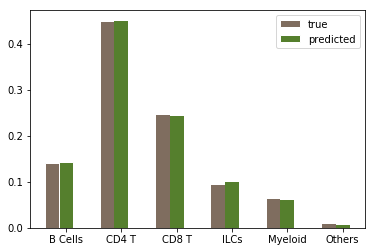

In [50]:
# libraries

 
# set width of bar
barWidth = 0.25
 
# set height of bar
bars = [[dictionary[key] for key in dictionary] for dictionary in [truedict, preddict]]
for x in range(len(bars)):
    total = sum(bars[x])
    for y in range(len(bars[x])):
        bars[x][y] = bars[x][y] / total
#set bar x coords
r1 = np.arange(6)
r2 = r1 + 0.25
plt.bar(r1, bars[0], color='#7f6d5f', width=barWidth, edgecolor='white', label='true')
plt.bar(r2, bars[1], color='#557f2d', width=barWidth, edgecolor='white', label='predicted')
plt.xticks([r + barWidth for r in range(len(bars[0]))], ['B Cells', 'CD4 T', 'CD8 T', 'ILCs', 'Myeloid', 'Others'])
plt.legend()
plt.show()

In [52]:
bars

[[0.14107681345881748,
  0.44842857769988487,
  0.24602346468197286,
  0.092838353037317689,
  0.06370757958980143,
  0.0079252115322056872],
 [0.14222297638786177,
  0.45030245419006548,
  0.24238377125593344,
  0.099598266094401283,
  0.059967424546853387,
  0.0055251075248846518]]